<a href="https://colab.research.google.com/github/D-314/cyber-tuber/blob/main/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!git clone https://github.com/D-314/cyber-tuber.git
!mv cyber-tuber/* .
!rm -rf cyber-tuber

Cloning into 'cyber-tuber'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 28 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), 40.21 KiB | 1.34 MiB/s, done.


In [35]:
df = pd.read_csv("baza_dannykh_dlya_stati.csv").set_index('№')
df.iloc[:, 9:25] = (~(df.iloc[:, 9:25] == 0))
df

,IL1a (rs1800587),TNF (rs1800629),IL6 (rs1800795),TNXB (rs1150754),FN1 (rs6707530),Пол,Возраст в момент взятия биоматериала,Житель Омска,Житель ОО,Работает\Учащийся,...,Рнтген бездинамики,Рентген +.1,Динамика полость 6 мес уменьш\отсутствует,Полость без динамики.1,Полость увелич\появилась,Динамика рентген 6 мес -,Рентген без динамики,Рентген +.2,Распространенность процесса,Исход
№,,,,,,,,,,,,,,,,,,,,,
ОСК111,G/G,G/G,G/G,C/C,T/T,муж,49,0,1(Крутинский),True,...,1,0,0,1,0,0,0,1(уменьш инфильтр; очагов),2-х сторонний;более 1 доли,неэффективный курс (сохранение полости)
ОСК112,G/G,G/G,C/C,C/C,T/G,муж,42,0,1(Крутинский),False,...,0,1(уменьш очагов; размеров пол-тей),0,1,0,0,0,1(уменьш очагов),Правостор более 1 доли,неэффективный курс (сохранение полости)
ОСК113,G/A,G/G,G/G,C/C,T/G,муж,54,0,1(Усть-Ишимский),False,...,0,1(уменьш пол-ти; очагов),1,0,0,0,0,1(уменьш пол-ти; очагов),2-х сторонний;более 1 доли,неэффективный курс (сохранение полости)
ОСК114,A/A,G/G,G/G,C/C,T/T,муж,44,1(ЛАО),0,True,...,1,0,1,0,0,0,0,1(уменьш пол-тей; очагов),Правостор в\дол,эффективный курс
ОСК115,G/A,G/G,G/C,C/C,T/G,муж,22,0,1(Муромцевский),True,...,0,1(уменьш очагов; инфильтр),1,0,0,0,0,1(исчезнов пол-тей; рассасыв очагов),Левосторонний в\долевой,эффективный курс
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ОСК183,G/G,G/G,G/C,C/C,T/G,муж,49,1(КАО),0,False,...,0,1(уменьш изменениЙ),0,1,0,0,0,1(уменьш изменениЙ),2-х сторонний;более 1 доли,сохр пол-тей
ОСК184,G/A,G/G,G/C,C/C,T/G,муж,44,1(ЛАО),0,False,...,0,1(уплотнение очагов),1,0,0,0,0,1(уплотнение очагов),2-х сторонний;более 1 доли,эффективный курс
ОСК185,G/G,G/G,G/C,C/C,T/T,жен,65,0,1(Исилькульский),False,...,0,1(уменьш изменениЙ),0,1,0,0,0,1(уменьш изменениЙ),Правостор нижнедолевой,сохр пол-тей


<Axes: xlabel='Образование среднее не полное,Среднее полное,Средне-специальное,Высшее'>

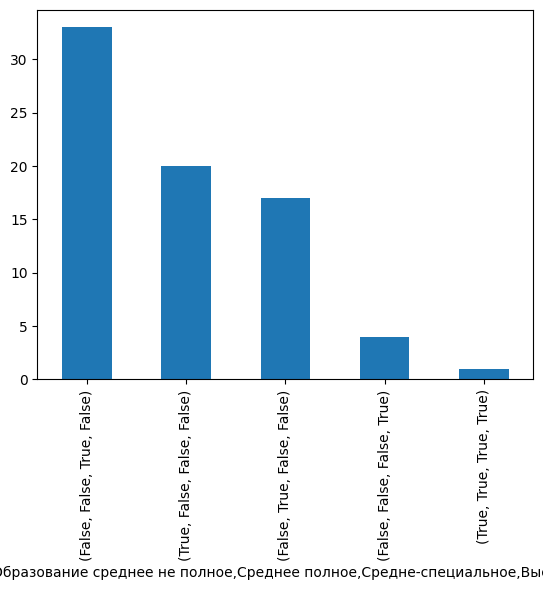

In [4]:
res = df[['Образование среднее не полное','Среднее полное','Средне-специальное','Высшее']].value_counts()
res.plot(kind = 'bar')

In [36]:
in_city = df['Житель Омска'].astype(str).apply(lambda x: 'Область' if (x[0] == '0') else 'Город' if (x[0] == '1') else np.NAN)
region = df['Житель Омска'].astype(str)+df['Житель ОО'].astype(str)
region = region.str.extract(r'\((.*?)\)')
df[['Житель Омска','Житель ОО']] = pd.concat([in_city, region], axis=1)

,Житель Омска
№,
ОСК111,Область
ОСК112,Область
ОСК113,Область
ОСК114,Город
ОСК115,Область
...,...
ОСК183,Город
ОСК184,Город
ОСК185,Область


,IL1a (rs1800587),TNF (rs1800629),IL6 (rs1800795),TNXB (rs1150754),FN1 (rs6707530),Пол,Возраст в момент взятия биоматериала,Житель Омска,Житель ОО,Работает\Учащийся,...,Рнтген бездинамики,Рентген +.1,Динамика полость 6 мес уменьш\отсутствует,Полость без динамики.1,Полость увелич\появилась,Динамика рентген 6 мес -,Рентген без динамики,Рентген +.2,Распространенность процесса,Исход
№,,,,,,,,,,,,,,,,,,,,,
ОСК111,G/G,G/G,G/G,C/C,T/T,муж,49,Область,Крутинский,True,...,1,0,0,1,0,0,0,1(уменьш инфильтр; очагов),2-х сторонний;более 1 доли,неэффективный курс (сохранение полости)
ОСК112,G/G,G/G,C/C,C/C,T/G,муж,42,Область,Крутинский,False,...,0,1(уменьш очагов; размеров пол-тей),0,1,0,0,0,1(уменьш очагов),Правостор более 1 доли,неэффективный курс (сохранение полости)
ОСК113,G/A,G/G,G/G,C/C,T/G,муж,54,Область,Усть-Ишимский,False,...,0,1(уменьш пол-ти; очагов),1,0,0,0,0,1(уменьш пол-ти; очагов),2-х сторонний;более 1 доли,неэффективный курс (сохранение полости)
ОСК114,A/A,G/G,G/G,C/C,T/T,муж,44,Город,ЛАО,True,...,1,0,1,0,0,0,0,1(уменьш пол-тей; очагов),Правостор в\дол,эффективный курс
ОСК115,G/A,G/G,G/C,C/C,T/G,муж,22,Область,Муромцевский,True,...,0,1(уменьш очагов; инфильтр),1,0,0,0,0,1(исчезнов пол-тей; рассасыв очагов),Левосторонний в\долевой,эффективный курс
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ОСК183,G/G,G/G,G/C,C/C,T/G,муж,49,Город,КАО,False,...,0,1(уменьш изменениЙ),0,1,0,0,0,1(уменьш изменениЙ),2-х сторонний;более 1 доли,сохр пол-тей
ОСК184,G/A,G/G,G/C,C/C,T/G,муж,44,Город,ЛАО,False,...,0,1(уплотнение очагов),1,0,0,0,0,1(уплотнение очагов),2-х сторонний;более 1 доли,эффективный курс
ОСК185,G/G,G/G,G/C,C/C,T/T,жен,65,Область,Исилькульский,False,...,0,1(уменьш изменениЙ),0,1,0,0,0,1(уменьш изменениЙ),Правостор нижнедолевой,сохр пол-тей


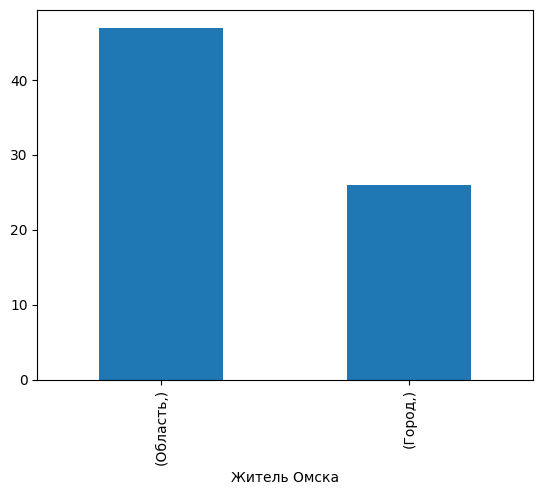

In [38]:
df[['Житель Омска']].value_counts().plot(kind='bar')
df

In [28]:
df[['Житель Омска','Житель ОО']] = pd.concat([in_city, region], axis=1)
df[['Житель Омска','Житель ОО']]
df

,IL1a (rs1800587),TNF (rs1800629),IL6 (rs1800795),TNXB (rs1150754),FN1 (rs6707530),Пол,Возраст в момент взятия биоматериала,Житель Омска,Житель ОО,Работает\Учащийся,...,Рнтген бездинамики,Рентген +.1,Динамика полость 6 мес уменьш\отсутствует,Полость без динамики.1,Полость увелич\появилась,Динамика рентген 6 мес -,Рентген без динамики,Рентген +.2,Распространенность процесса,Исход
№,,,,,,,,,,,,,,,,,,,,,
ОСК111,G/G,G/G,G/G,C/C,T/T,муж,49,Область,Крутинский,True,...,1,0,0,1,0,0,0,1(уменьш инфильтр; очагов),2-х сторонний;более 1 доли,неэффективный курс (сохранение полости)
ОСК112,G/G,G/G,C/C,C/C,T/G,муж,42,Область,Крутинский,False,...,0,1(уменьш очагов; размеров пол-тей),0,1,0,0,0,1(уменьш очагов),Правостор более 1 доли,неэффективный курс (сохранение полости)
ОСК113,G/A,G/G,G/G,C/C,T/G,муж,54,Область,Усть-Ишимский,False,...,0,1(уменьш пол-ти; очагов),1,0,0,0,0,1(уменьш пол-ти; очагов),2-х сторонний;более 1 доли,неэффективный курс (сохранение полости)
ОСК114,A/A,G/G,G/G,C/C,T/T,муж,44,Город,ЛАО,True,...,1,0,1,0,0,0,0,1(уменьш пол-тей; очагов),Правостор в\дол,эффективный курс
ОСК115,G/A,G/G,G/C,C/C,T/G,муж,22,Область,Муромцевский,True,...,0,1(уменьш очагов; инфильтр),1,0,0,0,0,1(исчезнов пол-тей; рассасыв очагов),Левосторонний в\долевой,эффективный курс
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ОСК183,G/G,G/G,G/C,C/C,T/G,муж,49,Город,КАО,False,...,0,1(уменьш изменениЙ),0,1,0,0,0,1(уменьш изменениЙ),2-х сторонний;более 1 доли,сохр пол-тей
ОСК184,G/A,G/G,G/C,C/C,T/G,муж,44,Город,ЛАО,False,...,0,1(уплотнение очагов),1,0,0,0,0,1(уплотнение очагов),2-х сторонний;более 1 доли,эффективный курс
ОСК185,G/G,G/G,G/C,C/C,T/T,жен,65,Область,Исилькульский,False,...,0,1(уменьш изменениЙ),0,1,0,0,0,1(уменьш изменениЙ),Правостор нижнедолевой,сохр пол-тей


In [45]:
res = df[['Образование среднее не полное','Среднее полное','Средне-специальное','Высшее']].value_counts()
res

Образование среднее не полное  Среднее полное  Средне-специальное  Высшее
False                          False           True                False     33
True                           False           False               False     20
False                          True            False               False     17
                               False           False               True       4
True                           True            True                True       1
dtype: int64